In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV with the performance data

In [2]:
czantoria_full = pd.read_csv('data/csv/czantoria_sauce.csv')

In [3]:
czantoria_full.columns = ['time', 'distance', 'heartrate', 'cadence', 'velocity_smooth', 'altitude', 'grade_smooth']

In [4]:
czantoria_nonzero = czantoria_full[(czantoria_full['velocity_smooth'] > 0) | (czantoria_full['time'] == 0)]

In [5]:
czantoria_time = czantoria_nonzero.groupby('distance').agg({'time': 'max'}).reset_index()['time']

In [6]:
czantoria_final = pd.merge(czantoria_nonzero, czantoria_time, on=['time'])

In [7]:
czantoria_final

,time,distance,heartrate,cadence,velocity_smooth,altitude,grade_smooth
0,0,0.0,91,0,0.000,414.4,-14.3
1,4,0.4,90,0,0.107,414.4,-14.7
2,5,2.8,90,162,0.560,414.0,-14.7
3,6,5.2,90,162,0.868,413.7,-15.3
4,7,7.8,89,162,1.552,413.3,-14.2
...,...,...,...,...,...,...,...
13380,13875,24137.1,182,158,1.806,846.4,18.2
13381,13876,24137.8,182,158,1.566,846.5,18.0
13382,13877,24138.8,182,158,1.388,846.7,17.0
13383,13879,24140.2,183,162,0.968,846.9,16.4


# Basic plots 

In [29]:
distance = czantoria_final['distance'].to_numpy()
hr = czantoria_final['heartrate'].to_numpy()
velocity = czantoria_final['velocity_smooth'].to_numpy()
elevation = czantoria_final['altitude'].to_numpy()
cadence = czantoria_final['cadence'].to_numpy()
grade = czantoria_final['grade_smooth'].to_numpy()

In [30]:
plt.rcParams['figure.figsize'] = [12, 8]

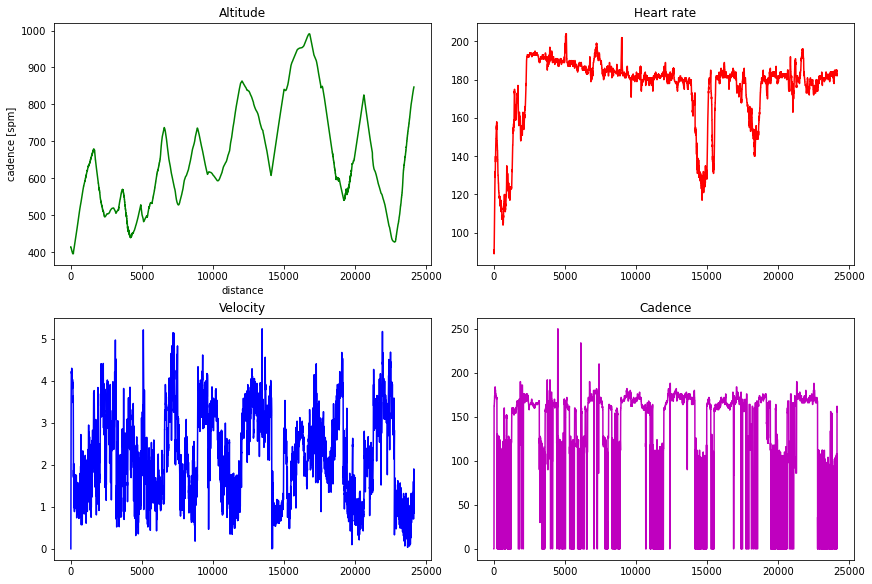

In [31]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)

axs[0, 0].plot(distance, elevation, 'g')
axs[0, 0].set_title("Altitude")
axs[0, 0].set_xlabel('distance')
axs[0, 0].set_ylabel('altitude [m]')

axs[0, 1].plot(distance, hr, 'r')
axs[0, 1].set_title("Heart rate")
axs[0, 0].set_xlabel('distance')
axs[0, 0].set_ylabel('heart rate [bpm]')

axs[1, 0].plot(distance, velocity, 'b')
axs[1, 0].set_title("Velocity")
axs[0, 0].set_xlabel('distance')
axs[0, 0].set_ylabel('velocity [m/s]')

axs[1, 1].plot(distance, cadence, 'm')
axs[1, 1].set_title("Cadence")
axs[0, 0].set_xlabel('distance')
axs[0, 0].set_ylabel('cadence [spm]')

plt.show()

# Functions to get the energy expenditure values

In [8]:
def get_running_cost(gradient):
    i = gradient
    C_r = 155.4*i**5 - 30.4*i**4 - 43.3*i**3 + 46.3*i**2 + 19.5*i + 3.6
    return C_r

In [9]:
def get_metabolic_energy_expenditure(grade, velocity):
    gradient = grade/100
    C_r = get_running_cost(gradient)
    return C_r * velocity
    

In [ ]:
def get_max_elevation(route_df):
    return route_df['altitude'].max()

In [ ]:
def get_small_route_segments_info(route_df):
    segment_length_horizontal = route_df['distance'].diff()[1:]
    segment_velocity = route_df['velocity_smooth'][1:]
    segment_gradient = route_df['grade'][1:]/100
    return (segment_length_horizontal, segment_velocity, segment_gradient)

In [ ]:
def get_cumulated_energy(route_df):
    